In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb


    

# Integration of data base






In [4]:
df = pd.read_csv("profiles.csv")


# Pre-Investigation of Data Set 


### General overview 




In [20]:
# Overview first 5 rows
df.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [17]:
# Overview on columns 
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [31]:
# General description on quantitative figures 
df.describe()


#DataFrame.count
#Count number of non-NA/null observations.

#DataFrame.max
#Maximum of the values in the object.

#DataFrame.min
#Minimum of the values in the object.

#DataFrame.mean
#Mean of the values.

#DataFrame.std
#Standard deviation of the observations.

#DataFrame.select_dtypes
#Subset of a DataFrame including/excluding columns based on their dtype.


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


# Preparing and cleaning the data set 




## Move categories into numbers (low med high to 1, 2, 3)

In [155]:
df["status_code"].value_counts()

0.0    57572
1.0     2374
Name: status_code, dtype: int64

In [145]:
body_type_mapping = {"rather not say": 0, "used up": 1, "jacked": 2, "overweight": 3, "full figured": 4, "skinnny": 5, "a little extra": 6, "curvy":7, "thin":8, "athletic":9, "fit":10, "average": 11}
df["body_type_code"] = df.body_type.map(body_type_mapping)

drinks_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drinks_mapping)

smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "trying to quit": 3, "yes": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)

sex_mapping = {"m": 0, "f": 1}
df["sex_code"] = df.sex.map(sex_mapping)

status_mapping = {"single": 0, "seeing someone": 1, "available": 0, "married": 1, "unkown": 0}
df["status_code"] = df.status.map(status_mapping)

#print(df["body_type_code"])

## Replace NANs 


In [146]:
# Replace NANs 

df.fillna({'body_type':0,
           'diet':0,
           'drinks':0,
           'drugs':0,
           'education':0,
           'ethnicity':0,
           'height':0,
           'job':0,
           'offspring':0,
           'pets':0,
           'religion':0,
           'sign':0,
           'smokes':0,
           'smokes_code':0,
           'drugs_code':0,
           'body_type_code':0,
           'drinks_code':0,
           'status_code':0,
           'speaks':""}, inplace = True)
df.isna().any()

age               False
body_type         False
diet              False
drinks            False
drugs             False
education         False
essay0             True
essay1             True
essay2             True
essay3             True
essay4             True
essay5             True
essay6             True
essay7             True
essay8             True
essay9             True
ethnicity         False
height            False
income            False
job               False
last_online       False
location          False
offspring         False
orientation       False
pets              False
religion          False
sex               False
sign              False
smokes            False
speaks            False
status            False
body_type_code    False
drinks_code       False
drugs_code        False
smokes_code       False
sex_code          False
status_code       False
dtype: bool

## Drop not required features

In [38]:
# Drop not required features 

df.drop(columns=["last_online"])




,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",,straight,has cats,,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,,m,pisces,no,"english, german (poorly)",single
4,29,athletic,,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",,straight,likes dogs and likes cats,,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,,,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,"south san francisco, california",doesn&rsquo;t have kids,straight,,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), span

# Introduction into the data 

## Age 

In [148]:
df.age.describe()

count      59946
unique         5
top       single
freq       55697
Name: status, dtype: object

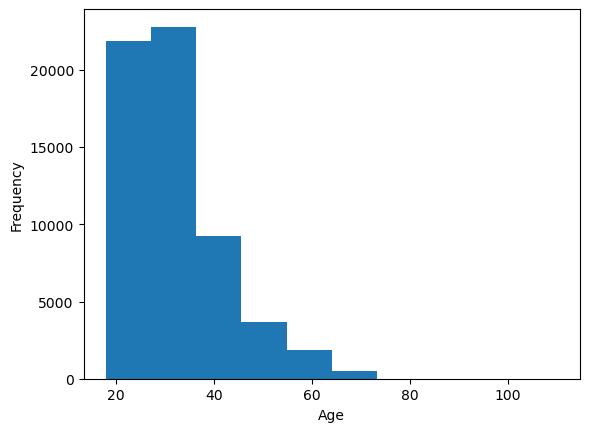

In [42]:
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Smoke & Drinking Habits 


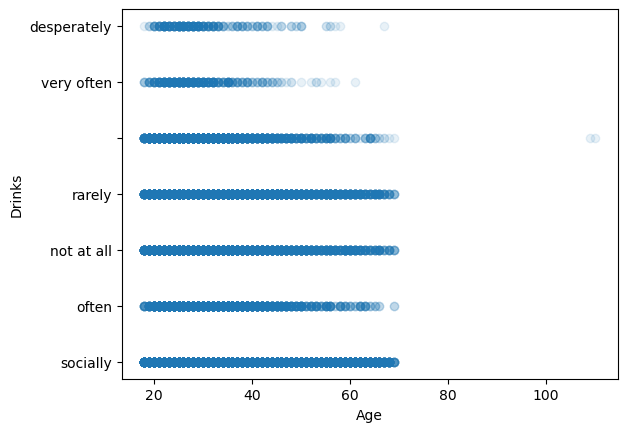

In [73]:
plt.scatter(df["age"], df["drinks"], alpha=0.1)
plt.xlabel("Age")
plt.ylabel("Drinks")
plt.show()

## Smoking & Relationship-State



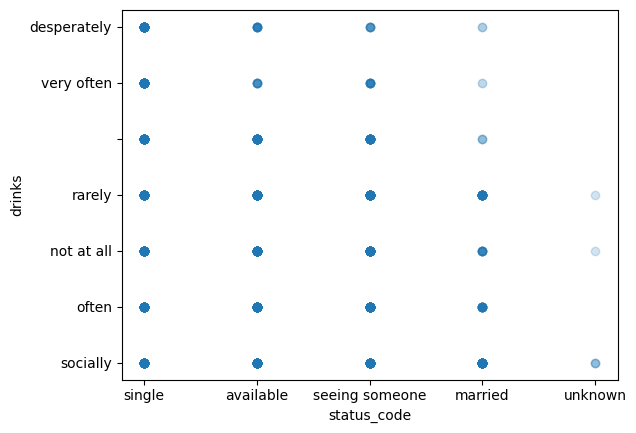

In [97]:
plt.scatter(df["status"], df["drinks"], alpha=0.1)
plt.xlabel("status_code")
plt.ylabel("drinks")
plt.show()

# Exploratory Analysis of the data set 

## Review of correlation between the items 

<AxesSubplot:>

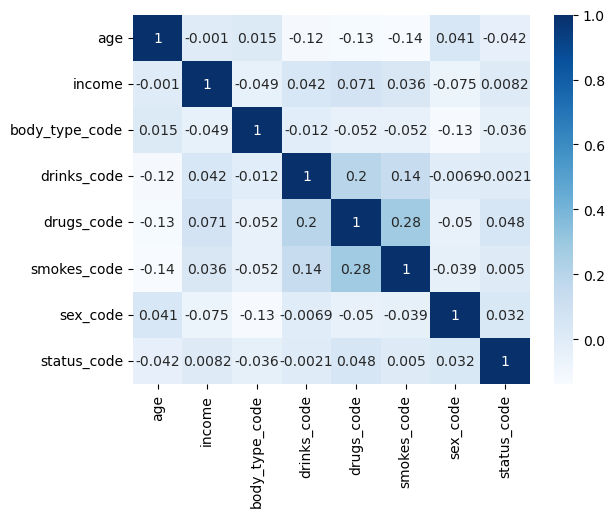

In [112]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

## Predicting the reltionship state 

Research question: can we predict the relationship state of a person based on the available data?



## Attempt 1: Using kNN 

KNN stands for K-Nearest Neighbors, a supervised machine learning algorithm used for classification and regression tasks. It works by finding the K nearest data points to a given test data point, and then assigning the label based on the majority class among the neighbors.

In our dating data set I want to use kNN to define the relationship-state of a person. Using the below defined data sets and a given accuracy I want to provide the info, if a person is a) single (either "available" or "single" or "unknown") or b) not single (either "seeing someone" or "married"). 

My expectation is that the given data is not a good indicator to predict the relationshio state. 

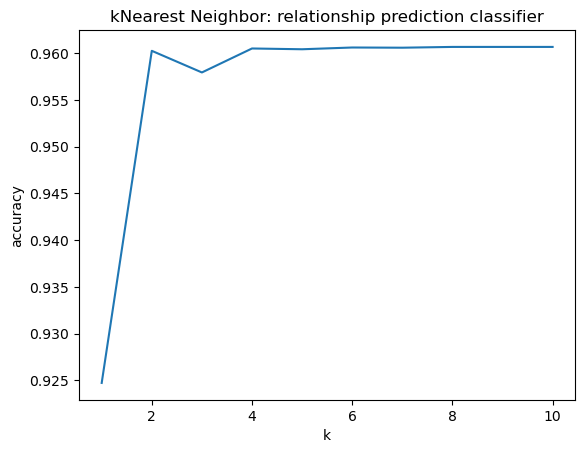

In [147]:
# Load scikit learn tools 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

features = df[['income', 'age', 'body_type_code', 'drinks_code', 'drugs_code', 'smokes_code']]
labels = df['status_code']

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
labels_transformed = lab.fit_transform(labels)

train_data, test_data, train_labels, test_labels = train_test_split(features, labels_transformed.ravel(), test_size = 0.8, random_state = 1)

k_list = []
accuracies = []

for k in range(0,10):
  k += 1
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(train_data, np.ravel(train_labels,order='C'))
  k_list.append(k)
  accuracies.append(classifier.score(test_data, test_labels))

plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('kNearest Neighbor: relationship prediction classifier')
plt.show()



# Conclusion Attempt 1: kNN 

Finding the k-nearest neighbor based on the selected labels (['income', 'age', 'body_type_code', 'drinks_code', 'drugs_code', 'smokes_code']) appears to be a good incidcator to decide the person's relationship status. Based on a high accuracy using k being 1 (accuracy = 0.925), or up to 5 (accuracy = 0.96). 

I conclude that somehow the model has an error, since such a high accuracy is - in my opinion - not realistic. The high accuracy could come due to a very high number of singles in the original data set (96%). Given that, the accuracy of 96% is the same as a random guess. 



# Attempt 2: Using Decision Trees 

A decision tree is a tree-based model used in decision analysis, machine learning and artificial intelligence. It represents a series of decisions and their possible consequences in the form of branches and leaves. Each internal node in the tree represents a test on an attribute, each branch represents an outcome of the test, and each leaf node represents a prediction or a class label. Decision trees can be used for classification or regression, by constructing a tree to model the relationships between predictors and the response variable.

As in attemtpt 1, in attempt 2 I want to predict if a person is a) single (either "available" or "single" or "unknown") or b) not single (either "seeing someone" or "married") usinng a decision tree (or forest) classifier. 


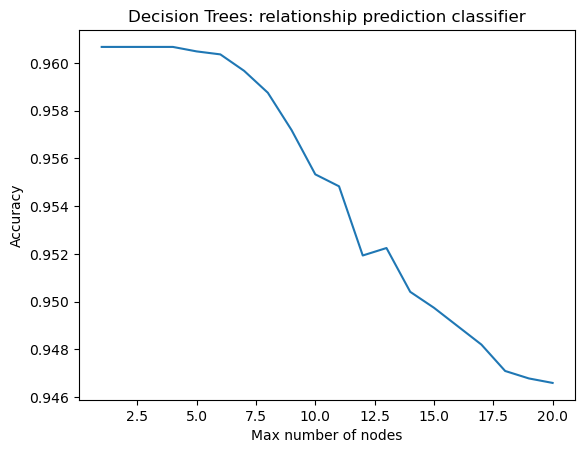

In [154]:
# Import decision tree tools 

from sklearn.tree import DecisionTreeClassifier

features = df[['income', 'age', 'body_type_code', 'drinks_code', 'drugs_code', 'smokes_code']]
labels = df['status_code']

list_max_depth = []
for i in range(0, 20):
    i += 1
    #Daten-Set mit Hilfe von "train_test_split" aufteilen
    train_data, test_data, train_labels, test_labels = train_test_split(features, labels_transformed.ravel(), test_size = 0.8, random_state = 1)
    
    #Daten für das Modell festlegen
    tree = DecisionTreeClassifier(random_state=1, max_depth = i)
    
    #Modell mit den Trainings-Daten trainieren 
    tree.fit(train_data, train_labels)
    
    #Erstelle Liste mit i's
    list_max_depth.append(tree.score(test_data, test_labels))

plt.plot(range(1,21),list_max_depth)
plt.xlabel("Max number of nodes")
plt.ylabel("Accuracy")
plt.title('Decision Trees: relationship prediction classifier')
plt.show()



# Conclusion Attempt 2: Decision Trees 

Finding the predicted relationship state is possible using decision trees. The accuracy with only using a max depth of "1" is considerably high (96%). The selected labels (['income', 'age', 'body_type_code', 'drinks_code', 'drugs_code', 'smokes_code']) appear to be a good incidcator to decide the person's relationship status. 

As with attempt one I conclude that the accuracy is high, but predictability might be biased by the high number of singles in the data set. 

